In [29]:
#libraries
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn import preprocessing, metrics
import plotly.express as px
from boruta import BorutaPy
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
import eli5
from eli5.sklearn import PermutationImportance
from sklearn.inspection import partial_dependence, plot_partial_dependence

###### DATA EXPLORATION
* CORRELATION, VIOLIN, SCATTER, PIE GRAPH
* PCA FOR VISUALIZATION 

###### PREPROCESSING
* NUMERICAL FEATURE STANDARDIZATION
* ENCODING
* BORUTA FOR FEATURE SELECTION


In [36]:
#get data
wine = pd.read_csv("wine.csv")

In [3]:
#information data
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
type                    6497 non-null object
fixed acidity           6487 non-null float64
volatile acidity        6489 non-null float64
citric acid             6494 non-null float64
residual sugar          6495 non-null float64
chlorides               6495 non-null float64
free sulfur dioxide     6497 non-null float64
total sulfur dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6488 non-null float64
sulphates               6493 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


In [4]:
#data view
wine.head()

type  fixed acidity  volatile acidity  citric acid  residual sugar  \
0  white            7.0              0.27         0.36            20.7   
1  white            6.3              0.30         0.34             1.6   
2  white            8.1              0.28         0.40             6.9   
3  white            7.2              0.23         0.32             8.5   
4  white            7.2              0.23         0.32             8.5   

   chlorides  free sulfur dioxide  total sulfur dioxide  density    pH  \
0      0.045                 45.0                 170.0   1.0010  3.00   
1      0.049                 14.0                 132.0   0.9940  3.30   
2      0.050                 30.0                  97.0   0.9951  3.26   
3      0.058                 47.0                 186.0   0.9956  3.19   
4      0.058                 47.0                 186.0   0.9956  3.19   

   sulphates  alcohol  quality  
0       0.45      8.8        6  
1       0.49      9.5        6  
2       0.44     10.1        6  
3       0.40      9.9        6  
4       0.40      9.9        6

In [5]:
#is null control
wine.isnull().sum()

type                     0
fixed acidity           10
volatile acidity         8
citric acid              3
residual sugar           2
chlorides                2
free sulfur dioxide      0
total sulfur dioxide     0
density                  0
pH                       9
sulphates                4
alcohol                  0
quality                  0
dtype: int64

* NA values will be evaluated.

In [6]:
#data statistics
wine.describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    6487.000000       6489.000000  6494.000000     6495.000000   
mean        7.216579          0.339691     0.318722        5.444326   
std         1.296750          0.164649     0.145265        4.758125   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.400000          0.230000     0.250000        1.800000   
50%         7.000000          0.290000     0.310000        3.000000   
75%         7.700000          0.400000     0.390000        8.100000   
max        15.900000          1.580000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  6495.000000          6497.000000           6497.000000  6497.000000   
mean      0.056042            30.525319            115.744574     0.994697   
std       0.035036            17.749400             56.521855     0.002999   
min       0.009000             1.000000              6.000000     0.987110   
25%       0.038000            17.000000             77.000000     0.992340   
50%       0.047000            29.000000            118.000000     0.994890   
75%       0.065000            41.000000            156.000000     0.996990   
max       0.611000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  6488.000000  6493.000000  6497.000000  6497.000000  
mean      3.218395     0.531215    10.491801     5.818378  
std       0.160748     0.148814     1.192712     0.873255  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.110000     0.430000     9.500000     5.000000  
50%       3.210000     0.510000    10.300000     6.000000  
75%       3.320000     0.600000    11.300000     6.000000  
max       4.010000     2.000000    14.900000     9.000000

In [7]:
# red wine statistics
wine[wine["type"]=="red"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1597.000000       1598.000000  1598.000000     1599.000000   
mean        8.322104          0.527738     0.271145        2.538806   
std         1.740767          0.179085     0.194744        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000              6.000000     0.990070   
25%       0.070000             7.000000             22.000000     0.995600   
50%       0.079000            14.000000             38.000000     0.996750   
75%       0.090000            21.000000             62.000000     0.997835   
max       0.611000            72.000000            289.000000     1.003690   

                pH    sulphates      alcohol      quality  
count  1597.000000  1597.000000  1599.000000  1599.000000  
mean      3.310864     0.658078    10.422983     5.636023  
std       0.154290     0.169594     1.065668     0.807569  
min       2.740000     0.330000     8.400000     3.000000  
25%       3.210000     0.550000     9.500000     5.000000  
50%       3.310000     0.620000    10.200000     6.000000  
75%       3.400000     0.730000    11.100000     6.000000  
max       4.010000     2.000000    14.900000     8.000000

In [8]:
# white wine statistics
wine[wine["type"]=="white"].describe()

fixed acidity  volatile acidity  citric acid  residual sugar  \
count    4890.000000       4891.000000  4896.000000     4896.000000   
mean        6.855532          0.278252     0.334250        6.393250   
std         0.843808          0.100811     0.120985        5.072275   
min         3.800000          0.080000     0.000000        0.600000   
25%         6.300000          0.210000     0.270000        1.700000   
50%         6.800000          0.260000     0.320000        5.200000   
75%         7.300000          0.320000     0.390000        9.900000   
max        14.200000          1.100000     1.660000       65.800000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  4896.000000          4898.000000           4898.000000  4898.000000   
mean      0.045778            35.308085            138.360657     0.994027   
std       0.021850            17.007137             42.498065     0.002991   
min       0.009000             2.000000              9.000000     0.987110   
25%       0.036000            23.000000            108.000000     0.991723   
50%       0.043000            34.000000            134.000000     0.993740   
75%       0.050000            46.000000            167.000000     0.996100   
max       0.346000           289.000000            440.000000     1.038980   

                pH    sulphates      alcohol      quality  
count  4891.000000  4896.000000  4898.000000  4898.000000  
mean      3.188203     0.489835    10.514267     5.877909  
std       0.151014     0.114147     1.230621     0.885639  
min       2.720000     0.220000     8.000000     3.000000  
25%       3.090000     0.410000     9.500000     5.000000  
50%       3.180000     0.470000    10.400000     6.000000  
75%       3.280000     0.550000    11.400000     6.000000  
max       3.820000     1.080000    14.200000     9.000000

In [5]:
# handle na groupping wine type
for col in wine.columns:
    if wine[col].dtypes =="float":
        wine[col].fillna(wine.groupby("type")[col].transform("mean"), inplace=True)

(12.0, 0.0)

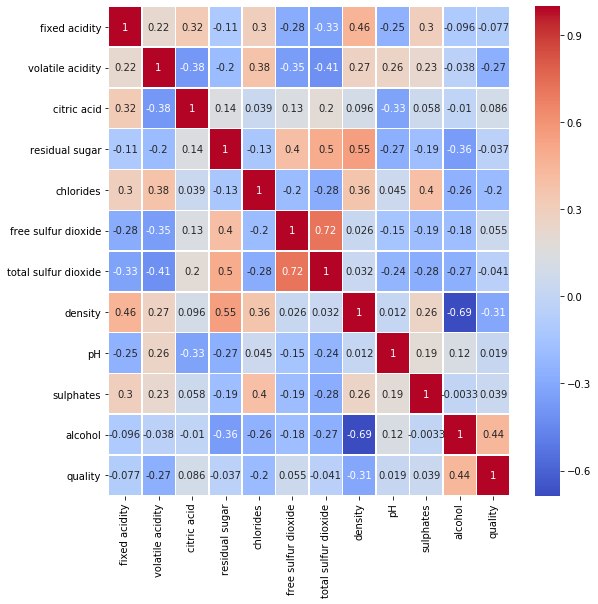

In [38]:
# correlation plot
plt.figure(figsize = (9,9))
ax = sns.heatmap(wine.corr(), annot=True, linewidths=.5, cmap="coolwarm")
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

* This heat map is for correlation relation between features. If high correlation is between two features, one of two features must be deleted. Because two feature affect the target the same way. This is multicollinarity. But in here, there is no high correlation between any features.

In [6]:
#target feature determine
wine["quality_level"] = np.where(wine["quality"] < 6, "Bad", 
                                 np.where(wine["quality"] < 8, "Not Bad", "Good"))

wine.drop("quality", axis=1, inplace=True)

In [12]:
# target feature distribution
wine.quality_level.value_counts()

Not Bad    3915
Bad        2384
Good        198
Name: quality_level, dtype: int64

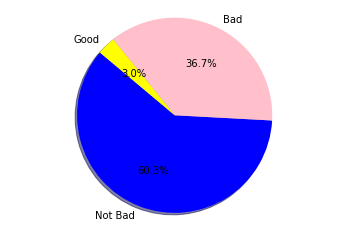

In [13]:
# pie chart for wine quality distribution 
colors = ['blue', 'pink', "yellow"]

# Plot
plt.pie(wine["quality_level"].value_counts(), explode= None, labels=wine["quality_level"].unique(), colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

* This is imbalanced dataset. Good wine is very few. It could be applied oversampling, but I will go on original data.

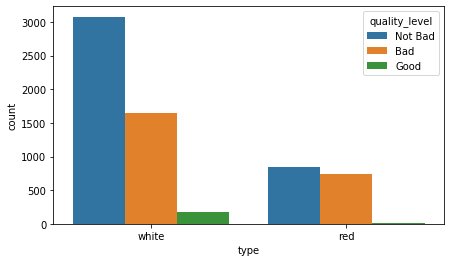

In [14]:
#quality level based on wine type
plt.figure(figsize=(7,4))

sns.countplot(x = 'type', hue = 'quality_level', data = wine, )
plt.show()
# 'low'=0, 'high'=1

* According to distribution, fullest of good wine is almost white. 

In [7]:
#data normalization
# Create scaler
scaler = preprocessing.StandardScaler() 

# Transform the feature
num_col = wine.drop(["type", "quality_level"], axis=1).copy()
num_col = pd.DataFrame(scaler.fit_transform(num_col.values), columns=num_col.columns, index=num_col.index)
wine = pd.concat([wine["type"], num_col, wine["quality_level"]], axis=1)

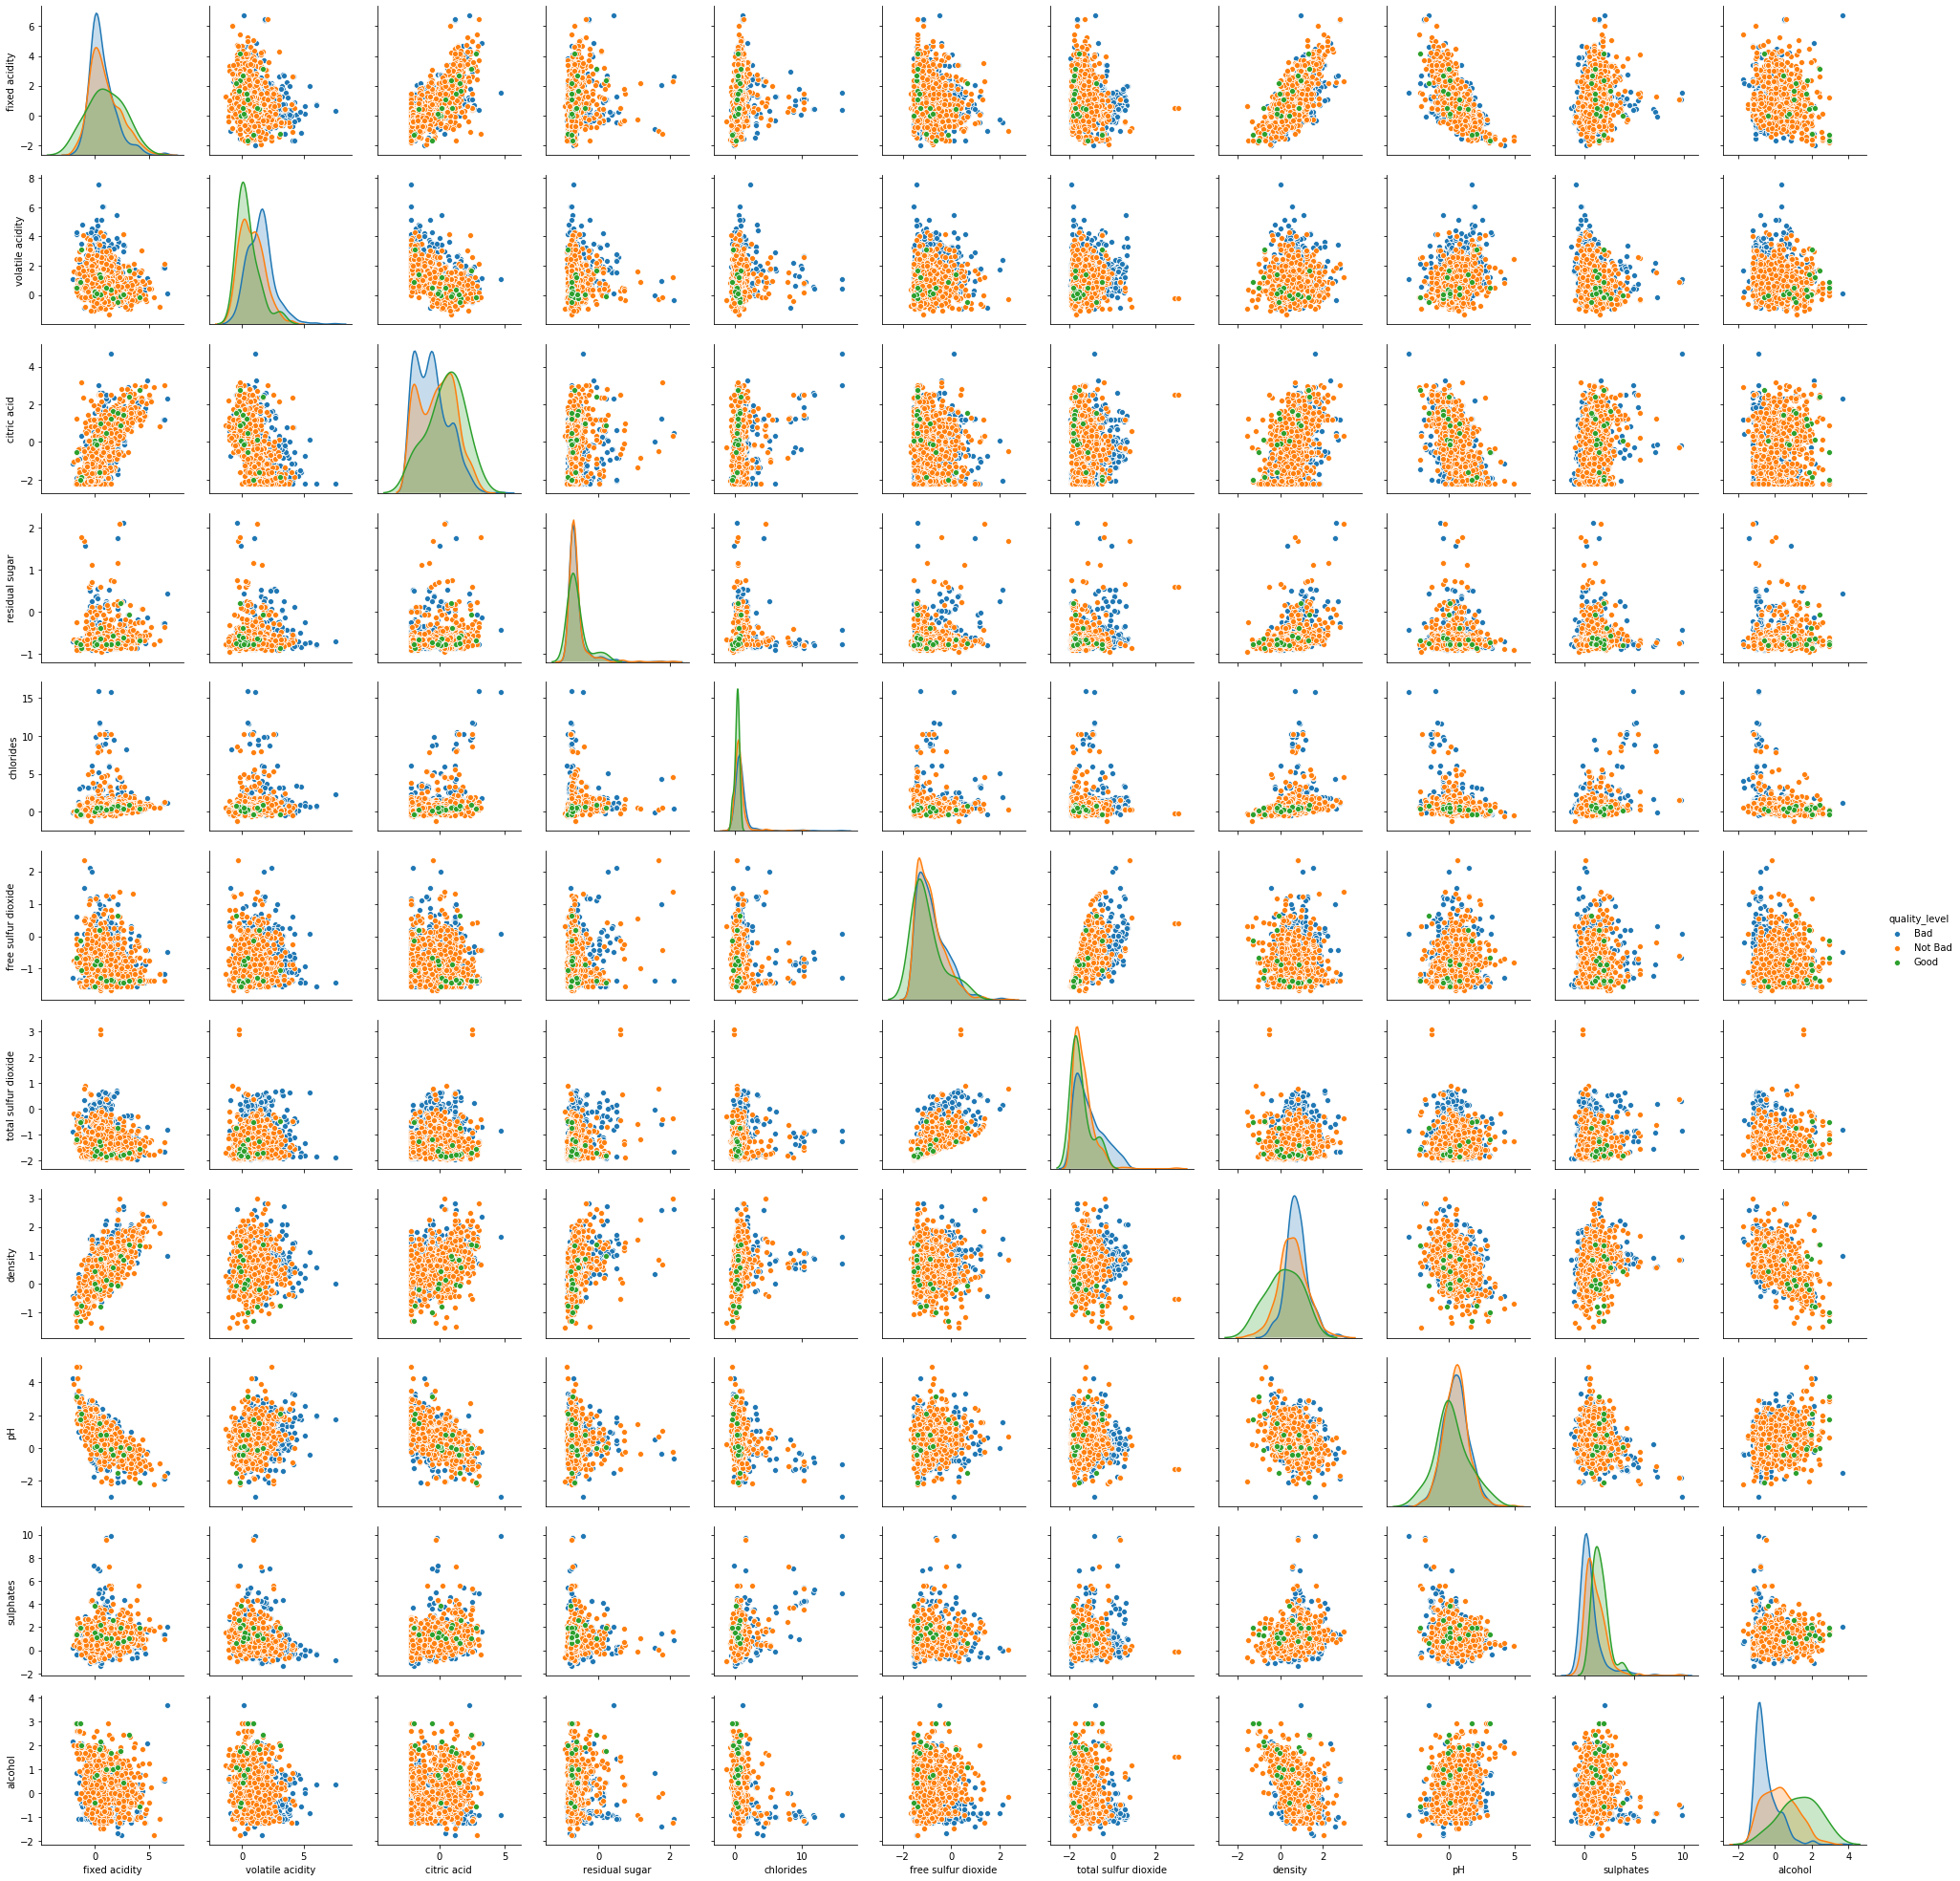

In [16]:
# correlation based on target values with scatter plot for red wine type
sns.pairplot(wine[wine["type"]=="red"], kind="scatter", hue="quality_level", diag_kind="kde")
plt.show()

* In this graph, correlation between features can be seen based on target variable when wine type is red. For example, there is a positive correlation between fixed acidity and density when target is equal to "Not Bad" 

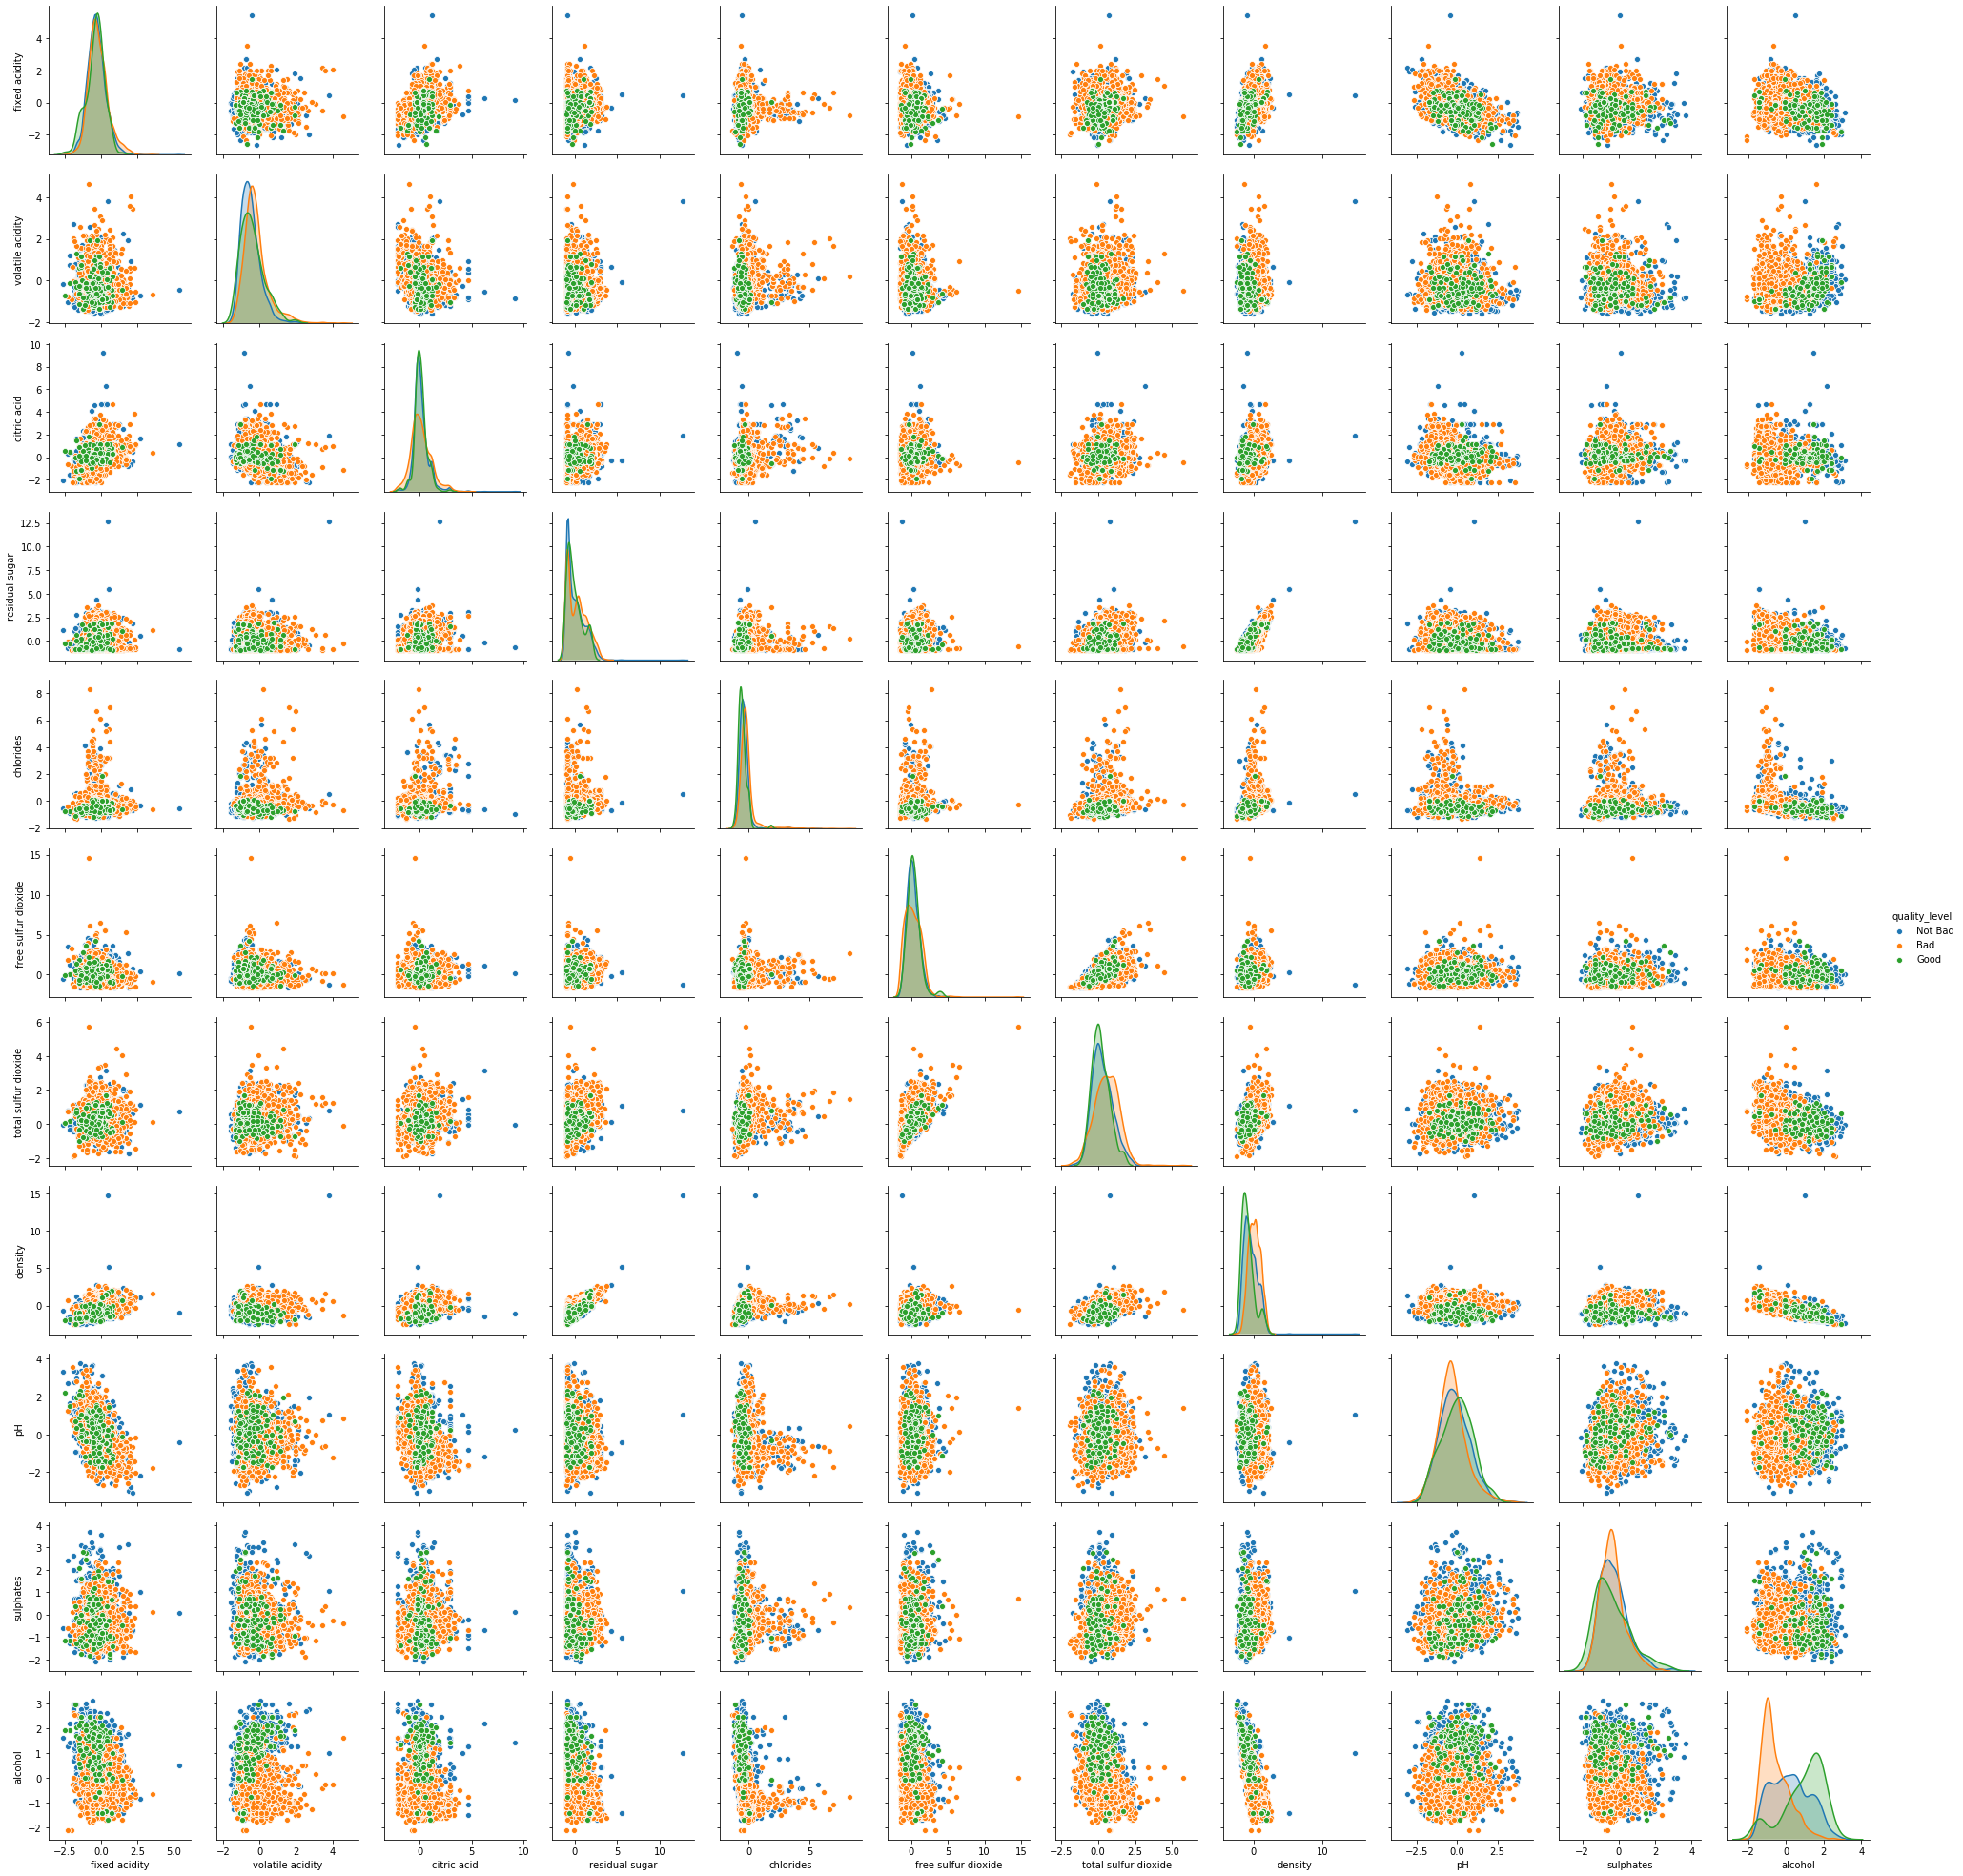

In [17]:
# correlation based on target values with scatter plot for white type wine
sns.pairplot(wine[wine["type"]=="white"], kind="scatter", hue="quality_level", diag_kind="kde")
plt.show()

* In this graph, correlation between features can be seen based on target variable when wine type is white. For example, there is a moderate positive correlation between density and residual sugar.

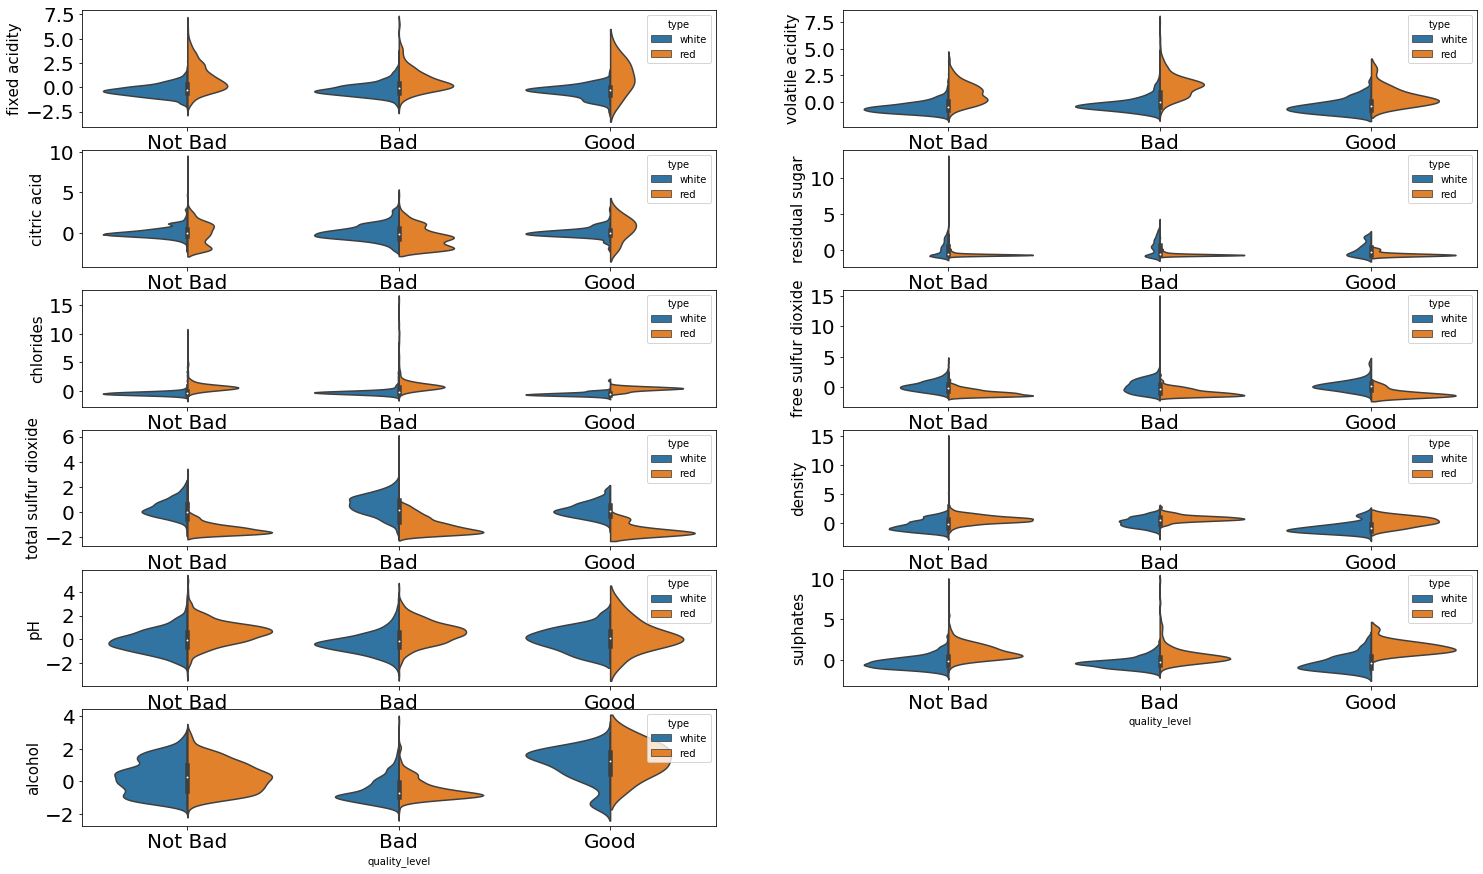

In [18]:
# For all features wine type distribution distribution based on target
plt.figure(figsize=(25,15))
i=0
for col in wine.columns:
    if wine[col].dtypes!="object":
        plt.subplot(6,2,i)
        sns.violinplot(x='quality_level', y=col, hue='type', data=wine, split=True)
        plt.xticks(size = 20)
        plt.yticks(size = 20)
        plt.ylabel('{}'.format(col), size = 15)
    i+=1    
    

* There is a strong difference between white and red wine type for total sulfur dioxide. 
* For white wine and Not Bad quality, residual sugar has very high values.
* Specially for white wine and bad quality, free sulfur dioxide has very high values.
* Alcohol rate is the same based on wine type but is few for bad quality.
* For bad quality, chlorides has very high values.

In [20]:
# Boruta for feature selection 
x = wine.drop(["quality_level", "type"], axis=1).values
y = wine['quality_level'].values.ravel()
rf = RandomForestClassifier(n_jobs=-1, class_weight='balanced', max_depth=5)
boruta_feature_selector = BorutaPy(rf, n_estimators='auto', verbose=2, random_state=4242, max_iter = 100, perc = 90)
boruta_feature_selector.fit(x,y)


Iteration: 	1 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	2 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	3 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	4 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	5 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	6 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	7 / 100
Confirmed: 	0
Tentative: 	11
Rejected: 	0
Iteration: 	8 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	0


BorutaPy finished running.

Iteration: 	9 / 100
Confirmed: 	11
Tentative: 	0
Rejected: 	0


BorutaPy(alpha=0.05,
         estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                          class_weight='balanced',
                                          criterion='gini', max_depth=5,
                                          max_features='auto',
                                          max_leaf_nodes=None, max_samples=None,
                                          min_impurity_decrease=0.0,
                                          min_impurity_split=None,
                                          min_samples_leaf=1,
                                          min_samples_split=2,
                                          min_weight_fraction_leaf=0.0,
                                          n_estimators=93, n_jobs=-1,
                                          oob_score=False,
                                          random_state=RandomState(MT19937) at 0x121F95D10,
                                          verbose=0, warm_start=Fals

* Boruta provides to select the important features for target. It is based on random forest. Firstly, it duplicates data and shuffle the duplicated part. And this is shadow features. It works random forest. Z-score is calculated for all features. If real feature z-score is less than shadow feature, this feature is rejected. Otherwise, it is confirmed. But if Boruta could not importance of feature, it is tentative. Until for all features is determined, this process works again and again. Summarise, boruta works in this way. In here, all features are confirmed by boruta.

<Figure size 432x288 with 0 Axes>

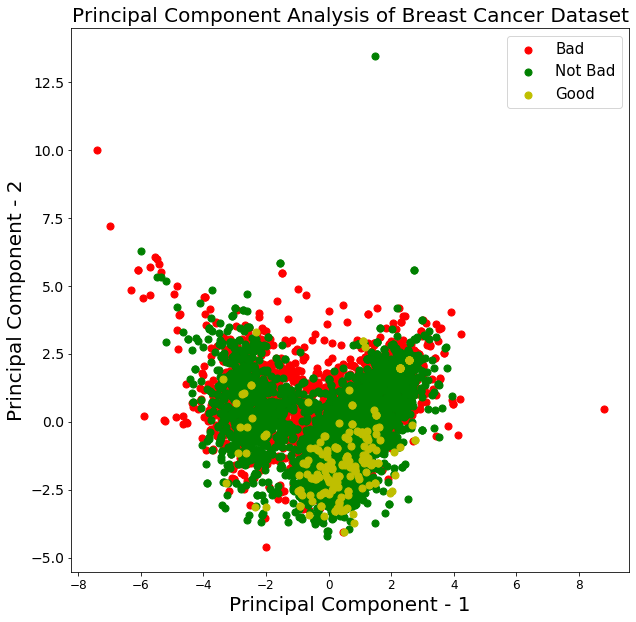

In [108]:
# PCA for data visualization 
x = wine.drop(["quality_level", "type"], axis=1)
y = wine['quality_level'].values.ravel()
pca_wine = PCA(n_components=2)
principalComponents_wine = pca_wine.fit_transform(x)

principal_wine = pd.DataFrame(data = principalComponents_wine
             , columns = ['principal component 1', 'principal component 2'])
             
plt.figure()
plt.figure(figsize=(10,10))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('Principal Component - 1',fontsize=20)
plt.ylabel('Principal Component - 2',fontsize=20)
plt.title("Principal Component Analysis of Breast Cancer Dataset",fontsize=20)
targets = ["Bad", "Not Bad", "Good"]
colors = ['r', 'g', 'y']
for target, color in zip(targets,colors):
    indicesToKeep = wine['quality_level'] == target
    plt.scatter(principal_wine.loc[indicesToKeep, 'principal component 1']
               , principal_wine.loc[indicesToKeep, 'principal component 2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

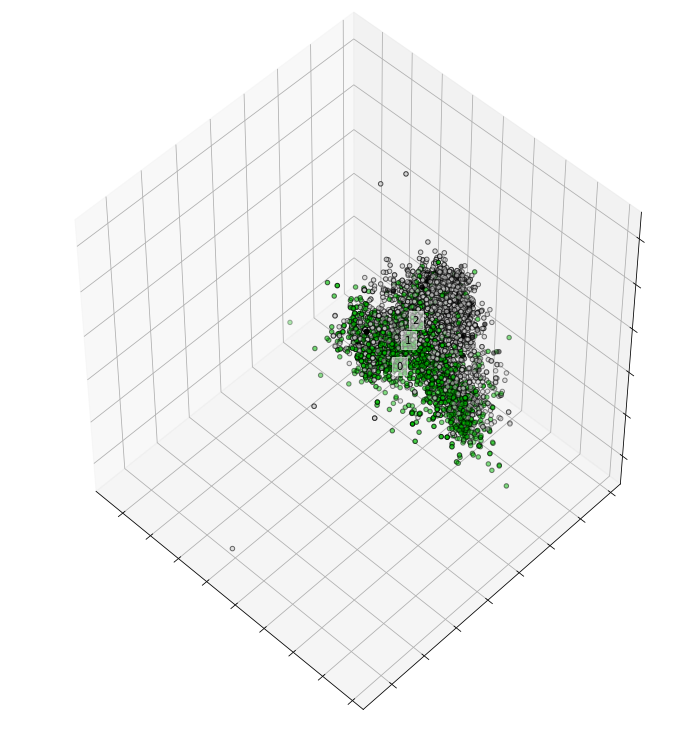

In [110]:
# PCA for data visualization 3D plot
wine["quality_lvl"] = np.where(wine["quality_level"] == "Bad", 0,
                                 np.where(wine["quality_level"] =="Not Bad", 1, 2))


np.random.seed(5)

centers = [[1, 1], [-1, -1], [1, -1]]

X = wine.drop(["type", "quality_level"], axis=1)
y = wine["quality_lvl"]

fig = plt.figure(1, figsize=(10, 10))
plt.clf()
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)

plt.cla()
pca = PCA(n_components=3)
pca.fit(X)
X = pca.transform(X)

for name, label in [(0, 0), (1, 1), (2, 2)]:
    ax.text3D(X[y == label, 0].mean(),
              X[y == label, 1].mean() + 1.5,
              X[y == label, 2].mean(), name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))
# Reorder the labels to have colors matching the cluster results
y = np.choose(y, [1, 2, 0]).astype(np.float)
ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.nipy_spectral,
           edgecolor='k')

ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])

plt.show()
wine.drop("quality_lvl", axis=1, inplace=True)

* To view distribution of target field based on all features, PCA is applied. When dimension is  2 or 3, it can be seen how data is distribute.

In [8]:
# Encoding object field
wine["type"] = np.where(wine["type"] == "red", 1, 0)

In [16]:
# train test split data
x = wine.drop("quality_level", axis=1)
y = wine.quality_level
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

###### MODELS
* DECISION TREE
* LOGISTIC REGRESSION
* RANDOM FOREST
* ADABOOST 

###### EVALUATION METRIC
* CONFUSION MATRIX
* ROC Curve

###### MODELS INTERPRETABILITY
* VARIABLE IMPORTANCE
* PERMUTATION IMPORTANCE
* PARTIAL DEPENDENCE PLOT 

* Machine learning models are black boxes. To interpret models, variable and permutation importance or partial dependence plot could be used. It can be understand contribution of each feature to models and relation between features can be explained

##### DECISION TREE

In [19]:
# Create Decision Tree classifer object
model_dt = DecisionTreeClassifier(ccp_alpha=0.0, class_weight="balanced", criterion='entropy',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

#cross vallidation to control overfitting
scores_dt = cross_val_score(model_dt, X_train, y_train, cv=10)

# Train Decision Tree Classifer
model_dt = model_dt.fit(X_train,y_train)

In [20]:
#cross val score result
scores_dt

array([0.70901639, 0.74385246, 0.74948665, 0.75770021, 0.724846  ,
       0.71868583, 0.73305955, 0.70431211, 0.73305955, 0.67967146])

In [21]:
print("DT TEST DATA PREDICTIONS")
print("------------------------------------------------------")
y_pred_test = model_dt.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

DT TEST DATA PREDICTIONS
------------------------------------------------------
[[403   3 177]
 [  4  16  19]
 [188  37 778]]
              precision    recall  f1-score   support

         Bad       0.68      0.69      0.68       583
        Good       0.29      0.41      0.34        39
     Not Bad       0.80      0.78      0.79      1003

    accuracy                           0.74      1625
   macro avg       0.59      0.63      0.60      1625
weighted avg       0.74      0.74      0.74      1625

0.7366153846153846


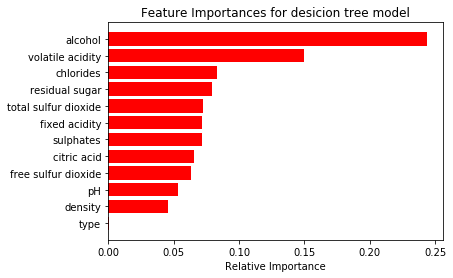

In [22]:
# feature importance based on variable importance approach for desicion tree model
features = x
importances = model_dt.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances for desicion tree model')
plt.barh(range(len(indices)), importances[indices], color='r', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [27]:
# feature importance based on permutation importance approach for desicion tree model
perm = PermutationImportance(model_dt, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

* For decision tree model, alcohol and volatile acidity are the most important features. Wine type feature does not affect the classify the data

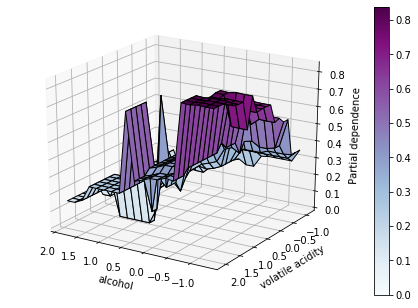

In [29]:
# partial dependence plot for decisin tree model relation between 'alcohol', 'volatile acidity' features
fig = plt.figure()

features = ('alcohol', 'volatile acidity')
pdp, axes = partial_dependence(model_dt, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)

plt.show()

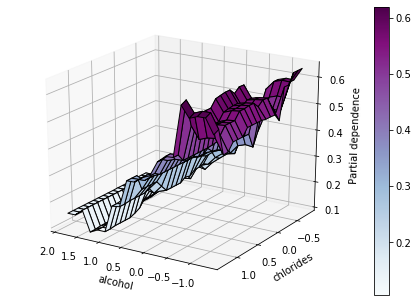

In [30]:
# partial dependence plot for decision tree model relation between 'alcohol', 'chlorides' features

fig = plt.figure()

features = ('alcohol', 'chlorides')
pdp, axes = partial_dependence(model_dt, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)

plt.show()

##### LOGISTIC REGRESSION

In [24]:
#modelling Logistic Regression
model_lr = LogisticRegression()

#cross vallidation to control overfitting
scores_lr = cross_val_score(model_lr, X_train, y_train, cv=10)

# Train Decision Tree Classifer
model_lr = model_lr.fit(X_train,y_train)

In [25]:
#cross vallidation result
scores_lr

array([0.71106557, 0.68647541, 0.73921971, 0.72279261, 0.71457906,
       0.69404517, 0.71868583, 0.70020534, 0.70431211, 0.70225873])

In [16]:
print("LR TEST DATA PREDICTIONS")
print("------------------------------------------------------")
y_pred_test = model_lr.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

LR TEST DATA PREDICTIONS
------------------------------------------------------
[[349   0 234]
 [  0   0  39]
 [172   0 831]]
              precision    recall  f1-score   support

         Bad       0.67      0.60      0.63       583
        Good       0.00      0.00      0.00        39
     Not Bad       0.75      0.83      0.79      1003

    accuracy                           0.73      1625
   macro avg       0.47      0.48      0.47      1625
weighted avg       0.70      0.73      0.71      1625

0.7261538461538461


/usr/local/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning:

Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.



In [23]:
# feature importance based on permutation importance approach for logistic regression model
perm = PermutationImportance(model_lr, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

* For logistic regression model, alcohol and volatile acidity are the most important features. chlorides and pH feature does not affect the classify the data

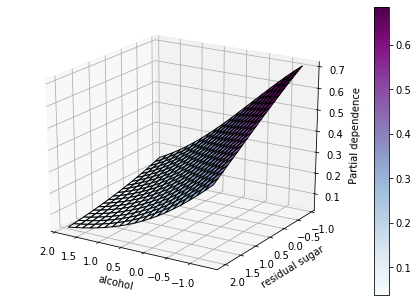

In [35]:
# partial dependence plot for logistic regression model relation between 'alcohol', 'residual sugar' features

fig = plt.figure()

features = ('alcohol', 'residual sugar')
pdp, axes = partial_dependence(model_lr, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)

plt.show()

##### RANDOM FOREST

In [10]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)

In [11]:
# fit train data to select best parametrs
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   29.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 640 tasks      | elapsed: 10.9min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed: 14.3min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [13]:
#best parameter for random forest
grid_search.best_estimator_

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [26]:
# Create Random Forest classifer object
model_rf = RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2,
                       verbose=0, warm_start=False)

# cross validation to control overfitting
scores_rf = cross_val_score(model_rf, X_train, y_train, cv=10)

# Train Random Forest Classifer
model_rf = model_rf.fit(X_train,y_train)

In [27]:
print("RF TEST DATA PREDICTIONS")
print("------------------------------------------------------")
y_pred_test = model_rf.predict(X_test)
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))


RF TEST DATA PREDICTIONS
------------------------------------------------------
[[424   0 159]
 [  1   1  37]
 [134   0 869]]
              precision    recall  f1-score   support

         Bad       0.76      0.73      0.74       583
        Good       1.00      0.03      0.05        39
     Not Bad       0.82      0.87      0.84      1003

    accuracy                           0.80      1625
   macro avg       0.86      0.54      0.54      1625
weighted avg       0.80      0.80      0.79      1625

0.7963076923076923


In [62]:
#cross validation result for random forest
scores_rf

array([0.71106557, 0.68647541, 0.73921971, 0.72279261, 0.71457906,
       0.69404517, 0.71868583, 0.70020534, 0.70431211, 0.70225873])

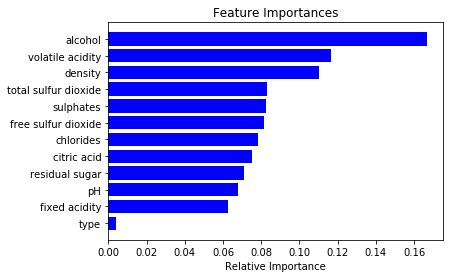

In [90]:
# feature importance based on variable importance approach for random forest model

features = x
importances = model_rf.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [97]:
# feature importance based on Permutation importance approach for random forest model

perm = PermutationImportance(model_rf, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

* For random forest model, alcohol, volatile acidity  and density are the most important features. Wine type and pH feature does not affect the classify the data

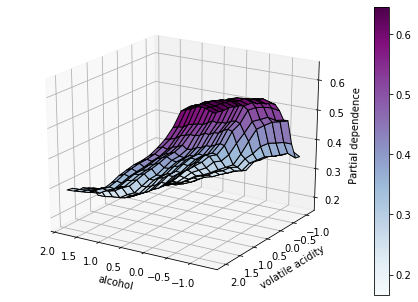

In [99]:
# partial dependence plot for random foresrt model relation between 'alcohol', 'volatile acidity' features

fig = plt.figure()

features = ('alcohol', 'volatile acidity')
pdp, axes = partial_dependence(model_rf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)

plt.show()

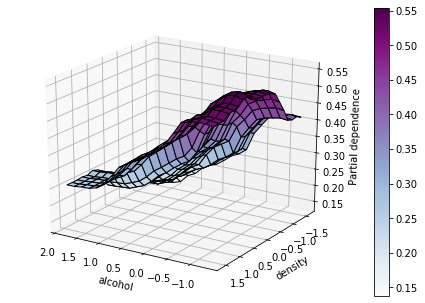

In [100]:
# partial dependence plot for random forest model relation between 'alcohol', 'density' featuresabs

fig = plt.figure()

features = ('alcohol', 'density')
pdp, axes = partial_dependence(model_rf, X_train, features=features,
                               grid_resolution=20)
XX, YY = np.meshgrid(axes[0], axes[1])
Z = pdp[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
#  pretty init view
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.subplots_adjust(top=0.9)

plt.show()

##### ADABOOST

In [105]:
# Create the parameter grid based on the results of ADABOOST and train to select best param
param_grid = {"base_estimator__criterion" : ["gini", "entropy"],
              "base_estimator__splitter" :   ["best", "random"],
              "n_estimators": [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              "learning_rate" : [0.01, 0.1, 0.5, 1.0]
             }


DTC = DecisionTreeClassifier(random_state = 11, max_depth = 6)

ABC = AdaBoostClassifier(base_estimator = DTC)

# run grid search
grid_search_ABC = GridSearchCV(ABC, param_grid=param_grid)
grid_search_ABC.fit(X_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                                                class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=6,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
 

In [106]:
#best parameter for ADABOOST
grid_search_ABC.best_estimator_

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                       

In [30]:
#modelling ADABOOST 
model_ada = AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                                                         random_state=11,
                                                         splitter='best'),
                   learning_rate=0.01, n_estimators=4, random_state=None)

# cross validation to control overfitting
scores_ada = cross_val_score(model_ada, X_train, y_train, cv=10)

# fit train data 
model_ada = model_ada.fit(X_train, y_train)

In [31]:
# cross validation result 
scores_ada 

array([0.70696721, 0.73360656, 0.74948665, 0.7412731 , 0.71047228,
       0.69404517, 0.71252567, 0.7063655 , 0.71047228, 0.71457906])

In [32]:
print("ADABOOST TEST DATA PREDICTIONS")
print("------------------------------------------------------")
y_pred_test = model_ada.predict(X_test) 
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))
print(accuracy_score(y_test, y_pred_test))

ADABOOST TEST DATA PREDICTIONS
------------------------------------------------------
[[419   0 164]
 [  2   2  35]
 [222   6 775]]
              precision    recall  f1-score   support

         Bad       0.65      0.72      0.68       583
        Good       0.25      0.05      0.09        39
     Not Bad       0.80      0.77      0.78      1003

    accuracy                           0.74      1625
   macro avg       0.57      0.51      0.52      1625
weighted avg       0.73      0.74      0.73      1625

0.736


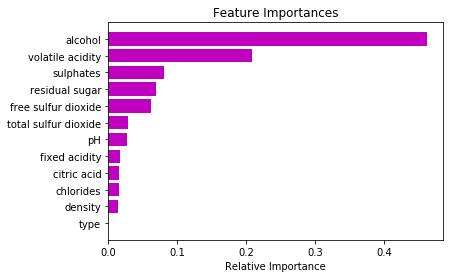

In [114]:
# feature importance based on variable importance approach for ADABOOST model
features = x
importances = model_ada.feature_importances_
indices = np.argsort(importances)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='m', align='center')
plt.yticks(range(len(indices)), [features.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [115]:
# feature importance based on Permutation importance approach for ADABOOST model

perm = PermutationImportance(model_ada, random_state=1).fit(X_train, y_train)
eli5.show_weights(perm, feature_names = X_train.columns.tolist())

* For random forest model, alcohol, volatile acidity  and sulphates are the most important features. Wine type and density feature does not affect the classify the data

##### ROC Curve for ALL MODELS

For DecisionTreeClassifier(ccp_alpha=0.0, class_weight='balanced',
                       criterion='entropy', max_depth=None, max_features=None,
                       max_leaf_nodes=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=1,
                       min_samples_split=2, min_weight_fraction_leaf=0.0,
                       presort='deprecated', random_state=None,
                       splitter='best') Modelling


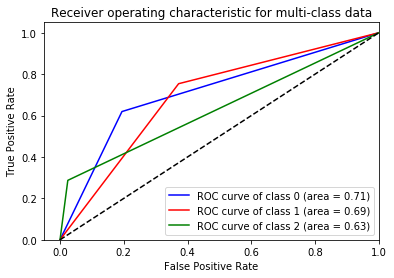

For LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False) Modelling


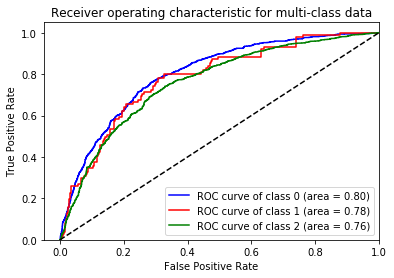

For RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=100, max_features=3,
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=3, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=2, verbose=0,
                       warm_start=False) Modelling


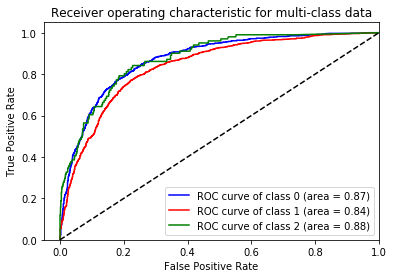

For AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='entropy',
                                                         max_depth=6,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort='deprecated',
                   

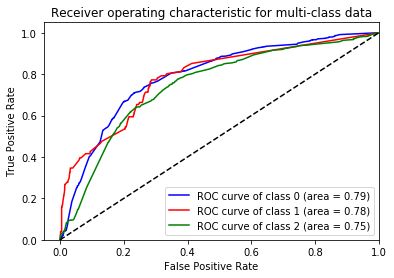

In [33]:
#ROC Curve for all models
from itertools import cycle

from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score
models=[model_dt, model_lr, model_rf, model_ada]
for i in models:
    print("For {} Modelling".format(i))
    # Binarize the output
    y = label_binarize(y, classes=["Bad", "Not Bad", "Good"])
    n_classes = y.shape[1]

    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=.5, random_state=0)

    # Learn to predict each class against the other
    classifier = OneVsRestClassifier(i)
    y_score = classifier.fit(X_train, y_train).predict_proba(X_test)


    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    colors = cycle(['blue', 'red', 'green'])
    for i, color in zip(range(n_classes), colors):
        plt.plot(fpr[i], tpr[i], color=color,
                 label='ROC curve of class {0} (area = {1:0.2f})'
                 ''.format(i, roc_auc[i]))

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([-0.05, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic for multi-class data')
    plt.legend(loc="lower right")
    plt.show()

* According to ROC Curve and confusion matrix, best model random forest. 